<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scale 조정

In [0]:
# wine dataset 사용, 13개의 특성, 178개의 요소로 구성
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header = None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Flavonoids',
                   'Total phenols', 'Nonflavanoid  phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                   '0D280/OD315 of diluted wines', 'Proline']
        
print( np.unique(df_wine['Class label']))

[1 2 3]


In [0]:

#사이킷런을 이용한 데이터 분할
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

In [0]:
# 정규화 0-1 사이로 조정
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm)
print(X_test_norm)

[[0.64619883 0.83201581 0.4248366  ... 0.45744681 0.28571429 0.19400856]
 [0.6871345  0.15612648 0.65359477 ... 0.81914894 0.63369963 0.68259629]
 [0.67836257 0.15019763 0.65359477 ... 0.75531915 0.52747253 0.71825963]
 ...
 [0.72222222 0.84980237 0.34640523 ... 0.10638298 0.02197802 0.09771755]
 [0.16081871 0.06916996 0.39215686 ... 0.54255319 0.68131868 0.43366619]
 [0.37719298 0.61857708 0.45751634 ... 0.75531915 0.68131868 0.13195435]]
[[ 0.69005848  0.22924901  0.64052288  0.30645161  0.55555556  0.69655172
   0.51687764  0.52        0.39873418  0.40497336  0.69148936  0.60805861
   0.78245364]
 [ 0.22222222  0.14031621  0.54248366  0.40860215  0.41975309  0.3137931
   0.29746835  0.64        0.19303797  0.10746004  1.03191489  0.35164835
   0.05492154]
 [ 0.87134503  0.22332016  0.49019608  0.17204301  0.32098765  0.52413793
   0.45991561  0.34        0.49367089  0.31172291  0.57446809  0.84615385
   0.72182596]
 [ 0.52339181  0.2055336   0.2875817  -0.01075269  0.37037037  0.575

In [0]:
# 표준화
ex = np.array([0,1,2,3,4,5])
print((ex-ex.mean())/ ex.std())

[-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [0]:
# 사이킷런을 사용한 표준화
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)


# L1 (다이아몬드꼴 규제, 특성선택하기)

Trevor Hastie, Robert tibshirani, Jerome Friedman (The Elements of Statistical Learning) 참조

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty = 'l1', C = 1, random_state = 1)
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

1.0
1.0


In [0]:
# estimated bias
lr.intercept_

array([-1.2639642 , -1.21594235, -2.37050719])

In [0]:
# estimated parameter
lr.coef_

array([[ 1.24641296,  0.17999168,  0.74629471, -1.1640092 ,  0.        ,
         0.        ,  1.15853575,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55799892,  2.50839749],
       [-1.53717641, -0.38719849, -0.99476611,  0.36466499, -0.05964102,
         0.        ,  0.66793791,  0.        ,  0.        , -1.93377181,
         1.23398109,  0.        , -2.23227845],
       [ 0.13595028,  0.16828119,  0.35723005,  0.        ,  0.        ,
         0.        , -2.43810556,  0.        ,  0.        ,  1.56352616,
        -0.81893878, -0.49273991,  0.        ]])

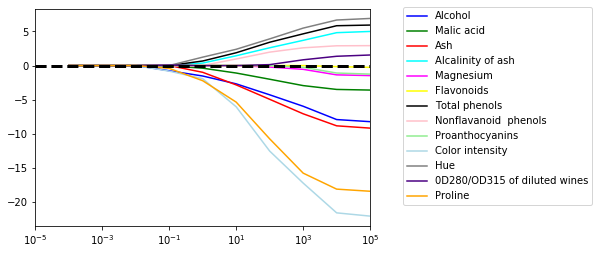

In [0]:
# 규제 강도에 따른 가중치변화 시각화하기
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [],[]
for c in np.arange(-4,6.):
  lr = LogisticRegression(solver = 'liblinear', multi_class='auto', penalty = 'l1', C = 10**c, random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color = color)

plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.xscale('log')
plt.legend(loc = 'upper left')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()

# SBS선택 알고리즘 (sequential backward selection)

sbs알고리즘은 사이킷런에 존재하지 않으므로 직접구현해야함


In [0]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state =1):
    self.scoring = scoring
    self.estimator = estimator
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state
  
  def fit(self, X, y):
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = self.test_size, random_state = self.random_state)
    
    dim = X_train.shape[1] # 13개의 feature
    self.indices_ = tuple(range(dim)) # feature를 숫자로 설정하여 나열
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]

    while dim > self.k_features: # 정해진 k_features까지 dim을 반복
      scores =[]
      subsets = []

      for p in combinations(self.indices_, r = dim - 1): # 가능한 features의 조합을 모두 시도해보고 scoring함
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])

    self.k_score_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

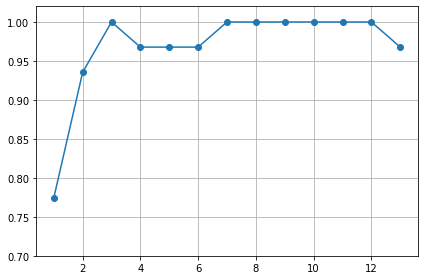

In [0]:
# KNN 분류기를 사용한 SBS동작
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.grid()
plt.tight_layout()
plt.show()

# RandomForest를 이용한 features selection

 1) Proline                        0.185453
 2) Total phenols                  0.174751
 3) Color intensity                0.143920
 4) 0D280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Flavonoids                     0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid  phenols          0.013354
13) Ash                            0.013279


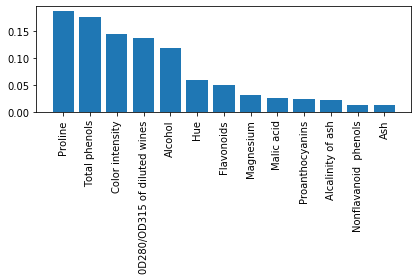

In [0]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print('%2d) %-*s %f' %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [0]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit= True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 5


In [0]:
for f in range(X_selected.shape[1]):
  print('%2d) %-*s %f' %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Total phenols                  0.174751
 3) Color intensity                0.143920
 4) 0D280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
